In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
from math import log
from decimal import Decimal
import altair as alt
import kagglehub as kh
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans


## Retrieve Necessary Data

### Scraping for current player stats & physical profiles (need shooting tendencies, usage, etc.)

### Uploading combine metrics from 2012-2019

In [2]:
combine_stats_12_19 = pd.read_csv('data/nba_draft_combine_all_years.csv')
combine_stats_12_19

,index,Unnamed: 0,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint
0,0,0,Blake Griffin,2009,1.0,80.50,82.00,83.25,105.0,35.5,140.5,32.0,137.0,248.0,8.2,NaN,NaN,22.0,10.95,3.28
1,1,1,Terrence Williams,2009,11.0,77.00,78.25,81.00,103.5,37.0,140.5,30.5,134.0,213.0,5.1,NaN,NaN,9.0,11.15,3.18
2,2,2,Gerald Henderson,2009,12.0,76.00,77.00,82.25,102.5,35.0,137.5,31.5,134.0,215.0,4.4,NaN,NaN,8.0,11.17,3.14
3,3,3,Tyler Hansbrough,2009,13.0,80.25,81.50,83.50,106.0,34.0,140.0,27.5,133.5,234.0,8.5,NaN,NaN,18.0,11.12,3.27
4,4,4,Earl Clark,2009,14.0,80.50,82.25,86.50,109.5,33.0,142.5,28.5,138.0,228.0,5.2,NaN,NaN,5.0,11.17,3.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,512,512,Peter Jok,2017,NaN,76.25,77.75,80.00,102.0,31.0,133.0,26.5,128.5,202.0,11.0,8.25,9.50,NaN,11.34,3.41
513,513,513,Rawle Alkins,2017,NaN,74.50,75.75,80.75,99.0,40.5,139.5,31.5,130.5,223.0,11.0,8.75,10.00,NaN,11.99,3.30
514,514,514,Sviatoslav Mykhailiuk,2017,NaN,78.50,79.50,77.00,100.0,33.0,133.0,27.0,127.0,220.0,11.4,8.00,9.25,NaN,12.40,3.53
515,515,515,Thomas Welsh,2017,NaN,83.50,84.50,84.00,109.5,NaN,NaN,NaN,NaN,254.0,10.9,9.00,10.50,NaN,NaN,NaN


In [3]:
# drop unnamed column
combine_stats_12_19 = combine_stats_12_19.drop(columns=['Unnamed: 0','index'])
combine_stats_12_19

,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint
0,Blake Griffin,2009,1.0,80.50,82.00,83.25,105.0,35.5,140.5,32.0,137.0,248.0,8.2,NaN,NaN,22.0,10.95,3.28
1,Terrence Williams,2009,11.0,77.00,78.25,81.00,103.5,37.0,140.5,30.5,134.0,213.0,5.1,NaN,NaN,9.0,11.15,3.18
2,Gerald Henderson,2009,12.0,76.00,77.00,82.25,102.5,35.0,137.5,31.5,134.0,215.0,4.4,NaN,NaN,8.0,11.17,3.14
3,Tyler Hansbrough,2009,13.0,80.25,81.50,83.50,106.0,34.0,140.0,27.5,133.5,234.0,8.5,NaN,NaN,18.0,11.12,3.27
4,Earl Clark,2009,14.0,80.50,82.25,86.50,109.5,33.0,142.5,28.5,138.0,228.0,5.2,NaN,NaN,5.0,11.17,3.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,Peter Jok,2017,NaN,76.25,77.75,80.00,102.0,31.0,133.0,26.5,128.5,202.0,11.0,8.25,9.50,NaN,11.34,3.41
513,Rawle Alkins,2017,NaN,74.50,75.75,80.75,99.0,40.5,139.5,31.5,130.5,223.0,11.0,8.75,10.00,NaN,11.99,3.30
514,Sviatoslav Mykhailiuk,2017,NaN,78.50,79.50,77.00,100.0,33.0,133.0,27.0,127.0,220.0,11.4,8.00,9.25,NaN,12.40,3.53
515,Thomas Welsh,2017,NaN,83.50,84.50,84.00,109.5,NaN,NaN,NaN,NaN,254.0,10.9,9.00,10.50,NaN,NaN,NaN


In [4]:
# replace draft pick nan with “undrafted”
combine_stats_12_19['Draft pick'] = combine_stats_12_19['Draft pick'].fillna('Undrafted')
combine_stats_12_19

,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint
0,Blake Griffin,2009,1.0,80.50,82.00,83.25,105.0,35.5,140.5,32.0,137.0,248.0,8.2,NaN,NaN,22.0,10.95,3.28
1,Terrence Williams,2009,11.0,77.00,78.25,81.00,103.5,37.0,140.5,30.5,134.0,213.0,5.1,NaN,NaN,9.0,11.15,3.18
2,Gerald Henderson,2009,12.0,76.00,77.00,82.25,102.5,35.0,137.5,31.5,134.0,215.0,4.4,NaN,NaN,8.0,11.17,3.14
3,Tyler Hansbrough,2009,13.0,80.25,81.50,83.50,106.0,34.0,140.0,27.5,133.5,234.0,8.5,NaN,NaN,18.0,11.12,3.27
4,Earl Clark,2009,14.0,80.50,82.25,86.50,109.5,33.0,142.5,28.5,138.0,228.0,5.2,NaN,NaN,5.0,11.17,3.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,Peter Jok,2017,Undrafted,76.25,77.75,80.00,102.0,31.0,133.0,26.5,128.5,202.0,11.0,8.25,9.50,NaN,11.34,3.41
513,Rawle Alkins,2017,Undrafted,74.50,75.75,80.75,99.0,40.5,139.5,31.5,130.5,223.0,11.0,8.75,10.00,NaN,11.99,3.30
514,Sviatoslav Mykhailiuk,2017,Undrafted,78.50,79.50,77.00,100.0,33.0,133.0,27.0,127.0,220.0,11.4,8.00,9.25,NaN,12.40,3.53
515,Thomas Welsh,2017,Undrafted,83.50,84.50,84.00,109.5,NaN,NaN,NaN,NaN,254.0,10.9,9.00,10.50,NaN,NaN,NaN


In [5]:
# view remaining columns with nans
combine_stats_12_19.isnull().sum()

Player                        0
Year                          0
Draft pick                    0
Height (No Shoes)             0
Height (With Shoes)           1
Wingspan                      0
Standing reach                0
Vertical (Max)               67
Vertical (Max Reach)         67
Vertical (No Step)           67
Vertical (No Step Reach)     67
Weight                        1
Body Fat                      3
Hand (Length)                47
Hand (Width)                 49
Bench                       233
Agility                      73
Sprint                       71
dtype: int64

In [6]:
# replace nans with 'Unknown'
combine_stats_12_19 = combine_stats_12_19.fillna('Unknown')
combine_stats_12_19

,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint
0,Blake Griffin,2009,1.0,80.50,82.0,83.25,105.0,35.5,140.5,32.0,137.0,248.0,8.2,Unknown,Unknown,22.0,10.95,3.28
1,Terrence Williams,2009,11.0,77.00,78.25,81.00,103.5,37.0,140.5,30.5,134.0,213.0,5.1,Unknown,Unknown,9.0,11.15,3.18
2,Gerald Henderson,2009,12.0,76.00,77.0,82.25,102.5,35.0,137.5,31.5,134.0,215.0,4.4,Unknown,Unknown,8.0,11.17,3.14
3,Tyler Hansbrough,2009,13.0,80.25,81.5,83.50,106.0,34.0,140.0,27.5,133.5,234.0,8.5,Unknown,Unknown,18.0,11.12,3.27
4,Earl Clark,2009,14.0,80.50,82.25,86.50,109.5,33.0,142.5,28.5,138.0,228.0,5.2,Unknown,Unknown,5.0,11.17,3.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,Peter Jok,2017,Undrafted,76.25,77.75,80.00,102.0,31.0,133.0,26.5,128.5,202.0,11.0,8.25,9.5,Unknown,11.34,3.41
513,Rawle Alkins,2017,Undrafted,74.50,75.75,80.75,99.0,40.5,139.5,31.5,130.5,223.0,11.0,8.75,10.0,Unknown,11.99,3.3
514,Sviatoslav Mykhailiuk,2017,Undrafted,78.50,79.5,77.00,100.0,33.0,133.0,27.0,127.0,220.0,11.4,8.0,9.25,Unknown,12.4,3.53
515,Thomas Welsh,2017,Undrafted,83.50,84.5,84.00,109.5,Unknown,Unknown,Unknown,Unknown,254.0,10.9,9.0,10.5,Unknown,Unknown,Unknown


In [7]:
# see all columns
combine_stats_12_19.columns


Index(['Player', 'Year', 'Draft pick', 'Height (No Shoes)',
       'Height (With Shoes)', 'Wingspan', 'Standing reach', 'Vertical (Max)',
       'Vertical (Max Reach)', 'Vertical (No Step)',
       'Vertical (No Step Reach)', 'Weight', 'Body Fat', 'Hand (Length)',
       'Hand (Width)', 'Bench', 'Agility', 'Sprint'],
      dtype='object')

In [8]:
# remove bench press as it is not a good indicator of NBA success
combine_stats_12_19_final = combine_stats_12_19.drop(columns=['Bench','Body Fat'])
combine_stats_12_19_final

,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Hand (Length),Hand (Width),Agility,Sprint
0,Blake Griffin,2009,1.0,80.50,82.0,83.25,105.0,35.5,140.5,32.0,137.0,248.0,Unknown,Unknown,10.95,3.28
1,Terrence Williams,2009,11.0,77.00,78.25,81.00,103.5,37.0,140.5,30.5,134.0,213.0,Unknown,Unknown,11.15,3.18
2,Gerald Henderson,2009,12.0,76.00,77.0,82.25,102.5,35.0,137.5,31.5,134.0,215.0,Unknown,Unknown,11.17,3.14
3,Tyler Hansbrough,2009,13.0,80.25,81.5,83.50,106.0,34.0,140.0,27.5,133.5,234.0,Unknown,Unknown,11.12,3.27
4,Earl Clark,2009,14.0,80.50,82.25,86.50,109.5,33.0,142.5,28.5,138.0,228.0,Unknown,Unknown,11.17,3.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,Peter Jok,2017,Undrafted,76.25,77.75,80.00,102.0,31.0,133.0,26.5,128.5,202.0,8.25,9.5,11.34,3.41
513,Rawle Alkins,2017,Undrafted,74.50,75.75,80.75,99.0,40.5,139.5,31.5,130.5,223.0,8.75,10.0,11.99,3.3
514,Sviatoslav Mykhailiuk,2017,Undrafted,78.50,79.5,77.00,100.0,33.0,133.0,27.0,127.0,220.0,8.0,9.25,12.4,3.53
515,Thomas Welsh,2017,Undrafted,83.50,84.5,84.00,109.5,Unknown,Unknown,Unknown,Unknown,254.0,9.0,10.5,Unknown,Unknown


### Read in other years NBA combine data (2000 on)

In [9]:
combine_stats_00_on = pd.read_csv('data//NBA_draft_combine.csv')
combine_stats_00_on

,YEAR,PLAYER,POS,HGT,WGT,BMI,BF,WNGSPN,STNDRCH,HANDL,...,STNDVERT,LPVERT,LANE,SHUTTLE,SPRINT,BENCH,BAR,PAN,PBHGT,PDHGT
0,2024,"Ajayi, Michael",SF,77.80,227.8,26.49,NaN,84.80,106.5,9.5,...,27.0,34.5,12.00,3.17,3.21,NaN,1.090,92.6,133.5,141.0
1,2024,"Ajinca, Melvin",SF,79.30,213.8,23.93,NaN,79.50,106.5,8.5,...,26.5,31.0,12.00,3.00,3.38,NaN,1.003,82.9,133.0,137.5
2,2024,"Alexander, Trey",SG,75.30,187.0,23.22,NaN,82.50,101.5,9.0,...,27.0,32.0,11.00,3.00,3.00,NaN,1.096,87.5,128.5,133.5
3,2024,"Almansa, Izan",C,81.30,219.6,23.39,NaN,85.00,110.0,9.0,...,28.0,35.0,11.00,3.00,3.00,NaN,1.046,85.6,138.0,145.0
4,2024,"Beekman, Reece",PG,73.30,196.4,25.73,NaN,78.50,100.0,9.0,...,30.0,37.0,11.00,3.00,3.00,NaN,1.072,76.5,130.0,137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,2000,"Smith, Mike",SF,78.50,198.0,22.59,NaN,80.50,103.0,NaN,...,33.0,21.0,11.32,NaN,3.22,12.0,1.025,NaN,136.0,124.0
1606,2000,"Stephens, Jarrett",PF,77.25,258.0,30.39,NaN,81.25,103.0,NaN,...,27.0,29.0,11.98,NaN,3.46,13.0,1.052,NaN,130.0,132.0
1607,2000,"Thornton, Bootsy",SG,75.50,194.5,23.99,NaN,78.50,101.5,NaN,...,26.5,31.0,12.08,NaN,3.33,7.0,1.040,NaN,128.0,132.5
1608,2000,"Walls, Jaquay",PG,73.25,165.5,21.68,NaN,74.50,96.5,NaN,...,28.5,35.5,10.75,NaN,3.23,0.0,1.017,NaN,125.0,132.0


In [10]:
# show oldest year
combine_stats_00_on['YEAR'].min()


2000

In [11]:
# view columns with nans
combine_stats_00_on.isnull().sum()

# remove cols not very indicative of NBA success
combine_stats_00_on = combine_stats_00_on.drop(columns=['BENCH','BF','POS','SHUTTLE'])
combine_stats_00_on

,YEAR,PLAYER,HGT,WGT,BMI,WNGSPN,STNDRCH,HANDL,HANDW,STNDVERT,LPVERT,LANE,SPRINT,BAR,PAN,PBHGT,PDHGT
0,2024,"Ajayi, Michael",77.80,227.8,26.49,84.80,106.5,9.5,9.8,27.0,34.5,12.00,3.21,1.090,92.6,133.5,141.0
1,2024,"Ajinca, Melvin",79.30,213.8,23.93,79.50,106.5,8.5,9.8,26.5,31.0,12.00,3.38,1.003,82.9,133.0,137.5
2,2024,"Alexander, Trey",75.30,187.0,23.22,82.50,101.5,9.0,10.0,27.0,32.0,11.00,3.00,1.096,87.5,128.5,133.5
3,2024,"Almansa, Izan",81.30,219.6,23.39,85.00,110.0,9.0,9.0,28.0,35.0,11.00,3.00,1.046,85.6,138.0,145.0
4,2024,"Beekman, Reece",73.30,196.4,25.73,78.50,100.0,9.0,9.0,30.0,37.0,11.00,3.00,1.072,76.5,130.0,137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,2000,"Smith, Mike",78.50,198.0,22.59,80.50,103.0,NaN,NaN,33.0,21.0,11.32,3.22,1.025,NaN,136.0,124.0
1606,2000,"Stephens, Jarrett",77.25,258.0,30.39,81.25,103.0,NaN,NaN,27.0,29.0,11.98,3.46,1.052,NaN,130.0,132.0
1607,2000,"Thornton, Bootsy",75.50,194.5,23.99,78.50,101.5,NaN,NaN,26.5,31.0,12.08,3.33,1.040,NaN,128.0,132.5
1608,2000,"Walls, Jaquay",73.25,165.5,21.68,74.50,96.5,NaN,NaN,28.5,35.5,10.75,3.23,1.017,NaN,125.0,132.0


In [12]:
combine_stats_00_on.columns


Index(['YEAR', 'PLAYER', 'HGT', 'WGT', 'BMI', 'WNGSPN', 'STNDRCH', 'HANDL',
       'HANDW', 'STNDVERT', 'LPVERT', 'LANE', 'SPRINT', 'BAR', 'PAN', 'PBHGT',
       'PDHGT'],
      dtype='object')

In [13]:
# remove comma from player names
combine_stats_00_on['PLAYER'] = combine_stats_00_on['PLAYER'].str.replace(',', '')

# switch first and last name
combine_stats_00_on['PLAYER'] = combine_stats_00_on['PLAYER'].str.split().str[::-1].str.join(' ')

combine_stats_00_on


,YEAR,PLAYER,HGT,WGT,BMI,WNGSPN,STNDRCH,HANDL,HANDW,STNDVERT,LPVERT,LANE,SPRINT,BAR,PAN,PBHGT,PDHGT
0,2024,Michael Ajayi,77.80,227.8,26.49,84.80,106.5,9.5,9.8,27.0,34.5,12.00,3.21,1.090,92.6,133.5,141.0
1,2024,Melvin Ajinca,79.30,213.8,23.93,79.50,106.5,8.5,9.8,26.5,31.0,12.00,3.38,1.003,82.9,133.0,137.5
2,2024,Trey Alexander,75.30,187.0,23.22,82.50,101.5,9.0,10.0,27.0,32.0,11.00,3.00,1.096,87.5,128.5,133.5
3,2024,Izan Almansa,81.30,219.6,23.39,85.00,110.0,9.0,9.0,28.0,35.0,11.00,3.00,1.046,85.6,138.0,145.0
4,2024,Reece Beekman,73.30,196.4,25.73,78.50,100.0,9.0,9.0,30.0,37.0,11.00,3.00,1.072,76.5,130.0,137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,2000,Mike Smith,78.50,198.0,22.59,80.50,103.0,NaN,NaN,33.0,21.0,11.32,3.22,1.025,NaN,136.0,124.0
1606,2000,Jarrett Stephens,77.25,258.0,30.39,81.25,103.0,NaN,NaN,27.0,29.0,11.98,3.46,1.052,NaN,130.0,132.0
1607,2000,Bootsy Thornton,75.50,194.5,23.99,78.50,101.5,NaN,NaN,26.5,31.0,12.08,3.33,1.040,NaN,128.0,132.5
1608,2000,Jaquay Walls,73.25,165.5,21.68,74.50,96.5,NaN,NaN,28.5,35.5,10.75,3.23,1.017,NaN,125.0,132.0


In [14]:
# make all columns lowercase
combine_stats_00_on.columns = combine_stats_00_on.columns.str.lower()
combine_stats_00_on




,year,player,hgt,wgt,bmi,wngspn,stndrch,handl,handw,stndvert,lpvert,lane,sprint,bar,pan,pbhgt,pdhgt
0,2024,Michael Ajayi,77.80,227.8,26.49,84.80,106.5,9.5,9.8,27.0,34.5,12.00,3.21,1.090,92.6,133.5,141.0
1,2024,Melvin Ajinca,79.30,213.8,23.93,79.50,106.5,8.5,9.8,26.5,31.0,12.00,3.38,1.003,82.9,133.0,137.5
2,2024,Trey Alexander,75.30,187.0,23.22,82.50,101.5,9.0,10.0,27.0,32.0,11.00,3.00,1.096,87.5,128.5,133.5
3,2024,Izan Almansa,81.30,219.6,23.39,85.00,110.0,9.0,9.0,28.0,35.0,11.00,3.00,1.046,85.6,138.0,145.0
4,2024,Reece Beekman,73.30,196.4,25.73,78.50,100.0,9.0,9.0,30.0,37.0,11.00,3.00,1.072,76.5,130.0,137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,2000,Mike Smith,78.50,198.0,22.59,80.50,103.0,NaN,NaN,33.0,21.0,11.32,3.22,1.025,NaN,136.0,124.0
1606,2000,Jarrett Stephens,77.25,258.0,30.39,81.25,103.0,NaN,NaN,27.0,29.0,11.98,3.46,1.052,NaN,130.0,132.0
1607,2000,Bootsy Thornton,75.50,194.5,23.99,78.50,101.5,NaN,NaN,26.5,31.0,12.08,3.33,1.040,NaN,128.0,132.5
1608,2000,Jaquay Walls,73.25,165.5,21.68,74.50,96.5,NaN,NaN,28.5,35.5,10.75,3.23,1.017,NaN,125.0,132.0


In [15]:
# from combine_stats_12_19_final, remove draft pick, height with shoes
combine_stats_12_19_final = combine_stats_12_19_final.drop(columns=['Draft pick', 'Height (With Shoes)'],axis=1)
combine_stats_12_19_final



,Player,Year,Height (No Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Hand (Length),Hand (Width),Agility,Sprint
0,Blake Griffin,2009,80.50,83.25,105.0,35.5,140.5,32.0,137.0,248.0,Unknown,Unknown,10.95,3.28
1,Terrence Williams,2009,77.00,81.00,103.5,37.0,140.5,30.5,134.0,213.0,Unknown,Unknown,11.15,3.18
2,Gerald Henderson,2009,76.00,82.25,102.5,35.0,137.5,31.5,134.0,215.0,Unknown,Unknown,11.17,3.14
3,Tyler Hansbrough,2009,80.25,83.50,106.0,34.0,140.0,27.5,133.5,234.0,Unknown,Unknown,11.12,3.27
4,Earl Clark,2009,80.50,86.50,109.5,33.0,142.5,28.5,138.0,228.0,Unknown,Unknown,11.17,3.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,Peter Jok,2017,76.25,80.00,102.0,31.0,133.0,26.5,128.5,202.0,8.25,9.5,11.34,3.41
513,Rawle Alkins,2017,74.50,80.75,99.0,40.5,139.5,31.5,130.5,223.0,8.75,10.0,11.99,3.3
514,Sviatoslav Mykhailiuk,2017,78.50,77.00,100.0,33.0,133.0,27.0,127.0,220.0,8.0,9.25,12.4,3.53
515,Thomas Welsh,2017,83.50,84.00,109.5,Unknown,Unknown,Unknown,Unknown,254.0,9.0,10.5,Unknown,Unknown


In [16]:
# capitalize first letter of each column in combine_stats_00_on
combine_stats_00_on.columns = combine_stats_00_on.columns.str.capitalize()

# remove bmi column
combine_stats_00_on = combine_stats_00_on.drop(columns=['Bmi'],axis=1)
combine_stats_00_on


,Year,Player,Hgt,Wgt,Wngspn,Stndrch,Handl,Handw,Stndvert,Lpvert,Lane,Sprint,Bar,Pan,Pbhgt,Pdhgt
0,2024,Michael Ajayi,77.80,227.8,84.80,106.5,9.5,9.8,27.0,34.5,12.00,3.21,1.090,92.6,133.5,141.0
1,2024,Melvin Ajinca,79.30,213.8,79.50,106.5,8.5,9.8,26.5,31.0,12.00,3.38,1.003,82.9,133.0,137.5
2,2024,Trey Alexander,75.30,187.0,82.50,101.5,9.0,10.0,27.0,32.0,11.00,3.00,1.096,87.5,128.5,133.5
3,2024,Izan Almansa,81.30,219.6,85.00,110.0,9.0,9.0,28.0,35.0,11.00,3.00,1.046,85.6,138.0,145.0
4,2024,Reece Beekman,73.30,196.4,78.50,100.0,9.0,9.0,30.0,37.0,11.00,3.00,1.072,76.5,130.0,137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,2000,Mike Smith,78.50,198.0,80.50,103.0,NaN,NaN,33.0,21.0,11.32,3.22,1.025,NaN,136.0,124.0
1606,2000,Jarrett Stephens,77.25,258.0,81.25,103.0,NaN,NaN,27.0,29.0,11.98,3.46,1.052,NaN,130.0,132.0
1607,2000,Bootsy Thornton,75.50,194.5,78.50,101.5,NaN,NaN,26.5,31.0,12.08,3.33,1.040,NaN,128.0,132.5
1608,2000,Jaquay Walls,73.25,165.5,74.50,96.5,NaN,NaN,28.5,35.5,10.75,3.23,1.017,NaN,125.0,132.0


In [17]:
# compare columns in both dataframes
print(combine_stats_00_on.columns)
print(combine_stats_12_19_final.columns)

Index(['Year', 'Player', 'Hgt', 'Wgt', 'Wngspn', 'Stndrch', 'Handl', 'Handw',
       'Stndvert', 'Lpvert', 'Lane', 'Sprint', 'Bar', 'Pan', 'Pbhgt', 'Pdhgt'],
      dtype='object')
Index(['Player', 'Year', 'Height (No Shoes)', 'Wingspan', 'Standing reach',
       'Vertical (Max)', 'Vertical (Max Reach)', 'Vertical (No Step)',
       'Vertical (No Step Reach)', 'Weight', 'Hand (Length)', 'Hand (Width)',
       'Agility', 'Sprint'],
      dtype='object')


In [18]:
# change columns in combine stats 00: Hgt to Height (No Shoes), Wgt to Weight,Wngspan to Wingspan, Stndrch to Standing reach, Handl to Hand (Length), Handw to Hand (Width)
combine_stats_00_on = combine_stats_00_on.rename(columns={'Hgt': 'Height (No Shoes)', 'Wgt': 'Weight', 'Wngspn': 'Wingspan',
                                                           'Stndrch': 'Standing reach', 'Handl': 'Hand (Length)', 'Handw': 'Hand (Width)',
                                                           'Stndvert': 'Vertical (No Step)', 'Lpvert': 'Vertical (Max)','Lane': 'Agility'})
combine_stats_00_on


,Year,Player,Height (No Shoes),Weight,Wingspan,Standing reach,Hand (Length),Hand (Width),Vertical (No Step),Vertical (Max),Agility,Sprint,Bar,Pan,Pbhgt,Pdhgt
0,2024,Michael Ajayi,77.80,227.8,84.80,106.5,9.5,9.8,27.0,34.5,12.00,3.21,1.090,92.6,133.5,141.0
1,2024,Melvin Ajinca,79.30,213.8,79.50,106.5,8.5,9.8,26.5,31.0,12.00,3.38,1.003,82.9,133.0,137.5
2,2024,Trey Alexander,75.30,187.0,82.50,101.5,9.0,10.0,27.0,32.0,11.00,3.00,1.096,87.5,128.5,133.5
3,2024,Izan Almansa,81.30,219.6,85.00,110.0,9.0,9.0,28.0,35.0,11.00,3.00,1.046,85.6,138.0,145.0
4,2024,Reece Beekman,73.30,196.4,78.50,100.0,9.0,9.0,30.0,37.0,11.00,3.00,1.072,76.5,130.0,137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,2000,Mike Smith,78.50,198.0,80.50,103.0,NaN,NaN,33.0,21.0,11.32,3.22,1.025,NaN,136.0,124.0
1606,2000,Jarrett Stephens,77.25,258.0,81.25,103.0,NaN,NaN,27.0,29.0,11.98,3.46,1.052,NaN,130.0,132.0
1607,2000,Bootsy Thornton,75.50,194.5,78.50,101.5,NaN,NaN,26.5,31.0,12.08,3.33,1.040,NaN,128.0,132.5
1608,2000,Jaquay Walls,73.25,165.5,74.50,96.5,NaN,NaN,28.5,35.5,10.75,3.23,1.017,NaN,125.0,132.0


In [19]:
# remove 'Bar', 'Pan', 'Pbhgt', 'Pdhgt' from combine_stats_00_on
combine_stats_00_on = combine_stats_00_on.drop(columns=['Bar', 'Pan', 'Pbhgt', 'Pdhgt'],axis=1)
combine_stats_00_on


,Year,Player,Height (No Shoes),Weight,Wingspan,Standing reach,Hand (Length),Hand (Width),Vertical (No Step),Vertical (Max),Agility,Sprint
0,2024,Michael Ajayi,77.80,227.8,84.80,106.5,9.5,9.8,27.0,34.5,12.00,3.21
1,2024,Melvin Ajinca,79.30,213.8,79.50,106.5,8.5,9.8,26.5,31.0,12.00,3.38
2,2024,Trey Alexander,75.30,187.0,82.50,101.5,9.0,10.0,27.0,32.0,11.00,3.00
3,2024,Izan Almansa,81.30,219.6,85.00,110.0,9.0,9.0,28.0,35.0,11.00,3.00
4,2024,Reece Beekman,73.30,196.4,78.50,100.0,9.0,9.0,30.0,37.0,11.00,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1605,2000,Mike Smith,78.50,198.0,80.50,103.0,NaN,NaN,33.0,21.0,11.32,3.22
1606,2000,Jarrett Stephens,77.25,258.0,81.25,103.0,NaN,NaN,27.0,29.0,11.98,3.46
1607,2000,Bootsy Thornton,75.50,194.5,78.50,101.5,NaN,NaN,26.5,31.0,12.08,3.33
1608,2000,Jaquay Walls,73.25,165.5,74.50,96.5,NaN,NaN,28.5,35.5,10.75,3.23


In [20]:
# from combine_stats_12_19_final, remove 'Vertical (Max Reach)', 'Vertical (No Step Reach)'
combine_stats_12_19_final = combine_stats_12_19_final.drop(columns=['Vertical (Max Reach)', 'Vertical (No Step Reach)'],axis=1)
combine_stats_12_19_final


,Player,Year,Height (No Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (No Step),Weight,Hand (Length),Hand (Width),Agility,Sprint
0,Blake Griffin,2009,80.50,83.25,105.0,35.5,32.0,248.0,Unknown,Unknown,10.95,3.28
1,Terrence Williams,2009,77.00,81.00,103.5,37.0,30.5,213.0,Unknown,Unknown,11.15,3.18
2,Gerald Henderson,2009,76.00,82.25,102.5,35.0,31.5,215.0,Unknown,Unknown,11.17,3.14
3,Tyler Hansbrough,2009,80.25,83.50,106.0,34.0,27.5,234.0,Unknown,Unknown,11.12,3.27
4,Earl Clark,2009,80.50,86.50,109.5,33.0,28.5,228.0,Unknown,Unknown,11.17,3.35
...,...,...,...,...,...,...,...,...,...,...,...,...
512,Peter Jok,2017,76.25,80.00,102.0,31.0,26.5,202.0,8.25,9.5,11.34,3.41
513,Rawle Alkins,2017,74.50,80.75,99.0,40.5,31.5,223.0,8.75,10.0,11.99,3.3
514,Sviatoslav Mykhailiuk,2017,78.50,77.00,100.0,33.0,27.0,220.0,8.0,9.25,12.4,3.53
515,Thomas Welsh,2017,83.50,84.00,109.5,Unknown,Unknown,254.0,9.0,10.5,Unknown,Unknown


In [21]:
# combine both dataframes
combine_stats_12_24 = pd.concat([combine_stats_00_on, combine_stats_12_19_final], ignore_index=True)
combine_stats_12_24


,Year,Player,Height (No Shoes),Weight,Wingspan,Standing reach,Hand (Length),Hand (Width),Vertical (No Step),Vertical (Max),Agility,Sprint
0,2024,Michael Ajayi,77.80,227.8,84.80,106.5,9.5,9.8,27.0,34.5,12.0,3.21
1,2024,Melvin Ajinca,79.30,213.8,79.50,106.5,8.5,9.8,26.5,31.0,12.0,3.38
2,2024,Trey Alexander,75.30,187.0,82.50,101.5,9.0,10.0,27.0,32.0,11.0,3.0
3,2024,Izan Almansa,81.30,219.6,85.00,110.0,9.0,9.0,28.0,35.0,11.0,3.0
4,2024,Reece Beekman,73.30,196.4,78.50,100.0,9.0,9.0,30.0,37.0,11.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2122,2017,Peter Jok,76.25,202.0,80.00,102.0,8.25,9.5,26.5,31.0,11.34,3.41
2123,2017,Rawle Alkins,74.50,223.0,80.75,99.0,8.75,10.0,31.5,40.5,11.99,3.3
2124,2017,Sviatoslav Mykhailiuk,78.50,220.0,77.00,100.0,8.0,9.25,27.0,33.0,12.4,3.53
2125,2017,Thomas Welsh,83.50,254.0,84.00,109.5,9.0,10.5,Unknown,Unknown,Unknown,Unknown


In [22]:
# remove players with more than 3 columns with "Unknown"
combine_stats_12_24 = combine_stats_12_24[combine_stats_12_24.isin(['Unknown']).sum(axis=1) <= 3]
combine_stats_12_24


,Year,Player,Height (No Shoes),Weight,Wingspan,Standing reach,Hand (Length),Hand (Width),Vertical (No Step),Vertical (Max),Agility,Sprint
0,2024,Michael Ajayi,77.80,227.8,84.80,106.5,9.5,9.8,27.0,34.5,12.0,3.21
1,2024,Melvin Ajinca,79.30,213.8,79.50,106.5,8.5,9.8,26.5,31.0,12.0,3.38
2,2024,Trey Alexander,75.30,187.0,82.50,101.5,9.0,10.0,27.0,32.0,11.0,3.0
3,2024,Izan Almansa,81.30,219.6,85.00,110.0,9.0,9.0,28.0,35.0,11.0,3.0
4,2024,Reece Beekman,73.30,196.4,78.50,100.0,9.0,9.0,30.0,37.0,11.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2121,2017,P.J. Dozier,77.25,201.0,83.00,101.0,8.5,9.5,34.0,39.0,10.84,3.15
2122,2017,Peter Jok,76.25,202.0,80.00,102.0,8.25,9.5,26.5,31.0,11.34,3.41
2123,2017,Rawle Alkins,74.50,223.0,80.75,99.0,8.75,10.0,31.5,40.5,11.99,3.3
2124,2017,Sviatoslav Mykhailiuk,78.50,220.0,77.00,100.0,8.0,9.25,27.0,33.0,12.4,3.53


In [23]:
# remove players with "Unknown" in any column or Nan
combine_stats_12_24 = combine_stats_12_24[combine_stats_12_24.isin(['Unknown']).sum(axis=1) == 0]
combine_stats_12_24 = combine_stats_12_24.dropna()
combine_stats_12_24


,Year,Player,Height (No Shoes),Weight,Wingspan,Standing reach,Hand (Length),Hand (Width),Vertical (No Step),Vertical (Max),Agility,Sprint
0,2024,Michael Ajayi,77.80,227.8,84.80,106.5,9.5,9.8,27.0,34.5,12.0,3.21
1,2024,Melvin Ajinca,79.30,213.8,79.50,106.5,8.5,9.8,26.5,31.0,12.0,3.38
2,2024,Trey Alexander,75.30,187.0,82.50,101.5,9.0,10.0,27.0,32.0,11.0,3.0
3,2024,Izan Almansa,81.30,219.6,85.00,110.0,9.0,9.0,28.0,35.0,11.0,3.0
4,2024,Reece Beekman,73.30,196.4,78.50,100.0,9.0,9.0,30.0,37.0,11.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2121,2017,P.J. Dozier,77.25,201.0,83.00,101.0,8.5,9.5,34.0,39.0,10.84,3.15
2122,2017,Peter Jok,76.25,202.0,80.00,102.0,8.25,9.5,26.5,31.0,11.34,3.41
2123,2017,Rawle Alkins,74.50,223.0,80.75,99.0,8.75,10.0,31.5,40.5,11.99,3.3
2124,2017,Sviatoslav Mykhailiuk,78.50,220.0,77.00,100.0,8.0,9.25,27.0,33.0,12.4,3.53


### Read in NCAA player data (xslx)

In [27]:
ncaa_player_data = pd.read_excel('data/ncaa-stats-complete.xlsx')
ncaa_player_data

,player,cls,year,gp,mpg,ppg,fgm,fga,fg%,3pm,...,fta,ft%,orb,drb,rpg,apg,spg,bpg,tov,pf
0,Kee-Kee Clark,Fr,2003,29,38.2,24.9,8.0,20.1,0.396,3.8,...,6.1,0.853,0.8,2.4,3.3,4.2,1.4,0.2,4.0,1.9
1,Carmelo Anthony,Fr,2003,35,36.4,22.2,7.9,17.5,0.453,1.6,...,6.8,0.706,2.9,6.9,9.7,2.2,1.5,0.9,2.2,2.2
2,Darshan Luckey,Fr,2003,28,37.5,21.6,7.2,18.8,0.383,1.6,...,7.2,0.777,0.8,4.4,5.1,1.6,1.7,0.3,4.1,2.3
3,Craig Smith,Fr,2003,31,31.9,19.9,7.8,12.9,0.603,0.1,...,6.3,0.677,3.2,4.7,7.9,1.3,0.9,0.9,2.4,3.4
4,Ike Diogu,Fr,2003,32,32.2,19.0,6.6,10.8,0.609,0.3,...,7.7,0.735,3.1,4.8,7.8,0.8,0.3,1.0,2.8,2.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15942,Ja'Shonte' Wright-McLeish,Sr,2024,32,28.2,6.3,2.3,6.2,0.365,1.3,...,0.8,0.654,0.5,1.2,1.7,0.9,1.3,0.3,0.9,2.5
15943,Santiago Vescovi,Sr,2024,35,25.4,6.3,1.9,5.3,0.368,1.2,...,1.5,0.796,0.7,2.9,3.7,2.5,1.1,0.0,1.0,2.6
15944,Robert Braswell IV,Sr,2024,27,16.7,6.3,2.3,5.2,0.433,1.2,...,0.9,0.667,0.9,0.9,1.7,0.3,0.3,0.3,0.5,1.0
15945,Akol Mawein,Sr,2024,34,18.5,6.3,2.2,4.3,0.503,0.3,...,2.2,0.773,0.9,2.4,3.3,0.9,0.6,0.5,1.2,2.2


In [41]:
# capitalize first letter of each column in ncaa_player_data
ncaa_player_data.columns = ncaa_player_data.columns.str.capitalize()
ncaa_player_data


,Player,Cls,Year,Gp,Mpg,Ppg,Fgm,Fga,Fg%,3pm,...,Fta,Ft%,Orb,Drb,Rpg,Apg,Spg,Bpg,Tov,Pf
0,Kee-Kee Clark,Fr,2003,29,38.2,24.9,8.0,20.1,0.396,3.8,...,6.1,0.853,0.8,2.4,3.3,4.2,1.4,0.2,4.0,1.9
1,Carmelo Anthony,Fr,2003,35,36.4,22.2,7.9,17.5,0.453,1.6,...,6.8,0.706,2.9,6.9,9.7,2.2,1.5,0.9,2.2,2.2
2,Darshan Luckey,Fr,2003,28,37.5,21.6,7.2,18.8,0.383,1.6,...,7.2,0.777,0.8,4.4,5.1,1.6,1.7,0.3,4.1,2.3
3,Craig Smith,Fr,2003,31,31.9,19.9,7.8,12.9,0.603,0.1,...,6.3,0.677,3.2,4.7,7.9,1.3,0.9,0.9,2.4,3.4
4,Ike Diogu,Fr,2003,32,32.2,19.0,6.6,10.8,0.609,0.3,...,7.7,0.735,3.1,4.8,7.8,0.8,0.3,1.0,2.8,2.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15942,Ja'Shonte' Wright-McLeish,Sr,2024,32,28.2,6.3,2.3,6.2,0.365,1.3,...,0.8,0.654,0.5,1.2,1.7,0.9,1.3,0.3,0.9,2.5
15943,Santiago Vescovi,Sr,2024,35,25.4,6.3,1.9,5.3,0.368,1.2,...,1.5,0.796,0.7,2.9,3.7,2.5,1.1,0.0,1.0,2.6
15944,Robert Braswell IV,Sr,2024,27,16.7,6.3,2.3,5.2,0.433,1.2,...,0.9,0.667,0.9,0.9,1.7,0.3,0.3,0.3,0.5,1.0
15945,Akol Mawein,Sr,2024,34,18.5,6.3,2.2,4.3,0.503,0.3,...,2.2,0.773,0.9,2.4,3.3,0.9,0.6,0.5,1.2,2.2


In [42]:
# join 2 dataframes on player name and year
players_to_cluster = combine_stats_12_24.merge(ncaa_player_data, on=['Player', 'Year'], how='inner')
players_to_cluster

,Year,Player,Height (No Shoes),Weight,Wingspan,Standing reach,Hand (Length),Hand (Width),Vertical (No Step),Vertical (Max),...,Fta,Ft%,Orb,Drb,Rpg,Apg,Spg,Bpg,Tov,Pf
0,2024,Trevon Brazile,81.30,215.0,87.8,108.5,9.0,10.0,33.0,41.0,...,2.3,0.695,1.7,4.2,5.9,0.5,0.7,1.2,1.5,2.3
1,2024,Carlton Carrington,75.80,194.8,80.0,99.0,9.0,9.0,29.0,37.0,...,2.8,0.785,0.5,4.7,5.2,4.1,0.6,0.2,1.9,2.4
2,2024,Devin Carter,74.30,193.0,80.8,98.0,9.0,9.0,35.0,42.0,...,5.0,0.749,1.0,7.4,8.4,3.5,1.7,0.9,2.6,1.9
3,2024,Isaiah Collier,74.50,204.6,76.8,97.5,9.0,9.0,30.0,34.0,...,5.8,0.673,0.6,2.3,2.9,4.3,1.5,0.2,3.3,2.4
4,2024,Zach Edey,87.80,299.0,94.8,115.0,10.0,11.0,26.0,32.0,...,11.5,0.710,4.7,7.5,12.2,2.0,0.3,2.2,2.2,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,2017,Jawun Evans,70.75,185.0,77.5,95.0,8.0,7.75,27.5,33.5,...,6.0,0.812,0.8,2.7,3.4,6.4,1.8,0.1,2.8,2.3
438,2017,Thomas Bryant,81.50,248.0,90.0,112.5,9.5,10.25,25.5,33.0,...,4.4,0.730,2.2,4.4,6.6,1.5,0.8,1.5,2.3,3.1
439,2017,Sindarius Thornwell,75.50,212.0,82.0,103.0,8.75,8.75,27.0,30.5,...,8.4,0.830,2.5,4.6,7.1,2.8,2.1,1.0,2.5,2.3
440,2017,Eric Mika,80.50,233.0,82.0,106.5,8.25,8.75,29.0,32.0,...,8.7,0.763,3.1,6.1,9.2,1.6,0.6,1.9,2.5,2.7


In [43]:
# show all columns
players_to_cluster.columns

Index(['Year', 'Player', 'Height (No Shoes)', 'Weight', 'Wingspan',
       'Standing reach', 'Hand (Length)', 'Hand (Width)', 'Vertical (No Step)',
       'Vertical (Max)', 'Agility', 'Sprint', 'Cls', 'Gp', 'Mpg', 'Ppg', 'Fgm',
       'Fga', 'Fg%', '3pm', '3pa', '3p%', 'Ftm', 'Fta', 'Ft%', 'Orb', 'Drb',
       'Rpg', 'Apg', 'Spg', 'Bpg', 'Tov', 'Pf'],
      dtype='object')

In [44]:
# remove Gp,Cls,Mpg,Pf
players_to_cluster = players_to_cluster.drop(columns=['Gp', 'Cls', 'Mpg', 'Pf'], axis=1)
players_to_cluster

,Year,Player,Height (No Shoes),Weight,Wingspan,Standing reach,Hand (Length),Hand (Width),Vertical (No Step),Vertical (Max),...,Ftm,Fta,Ft%,Orb,Drb,Rpg,Apg,Spg,Bpg,Tov
0,2024,Trevon Brazile,81.30,215.0,87.8,108.5,9.0,10.0,33.0,41.0,...,1.6,2.3,0.695,1.7,4.2,5.9,0.5,0.7,1.2,1.5
1,2024,Carlton Carrington,75.80,194.8,80.0,99.0,9.0,9.0,29.0,37.0,...,2.2,2.8,0.785,0.5,4.7,5.2,4.1,0.6,0.2,1.9
2,2024,Devin Carter,74.30,193.0,80.8,98.0,9.0,9.0,35.0,42.0,...,3.8,5.0,0.749,1.0,7.4,8.4,3.5,1.7,0.9,2.6
3,2024,Isaiah Collier,74.50,204.6,76.8,97.5,9.0,9.0,30.0,34.0,...,3.9,5.8,0.673,0.6,2.3,2.9,4.3,1.5,0.2,3.3
4,2024,Zach Edey,87.80,299.0,94.8,115.0,10.0,11.0,26.0,32.0,...,8.1,11.5,0.710,4.7,7.5,12.2,2.0,0.3,2.2,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,2017,Jawun Evans,70.75,185.0,77.5,95.0,8.0,7.75,27.5,33.5,...,4.8,6.0,0.812,0.8,2.7,3.4,6.4,1.8,0.1,2.8
438,2017,Thomas Bryant,81.50,248.0,90.0,112.5,9.5,10.25,25.5,33.0,...,3.2,4.4,0.730,2.2,4.4,6.6,1.5,0.8,1.5,2.3
439,2017,Sindarius Thornwell,75.50,212.0,82.0,103.0,8.75,8.75,27.0,30.5,...,6.9,8.4,0.830,2.5,4.6,7.1,2.8,2.1,1.0,2.5
440,2017,Eric Mika,80.50,233.0,82.0,106.5,8.25,8.75,29.0,32.0,...,6.6,8.7,0.763,3.1,6.1,9.2,1.6,0.6,1.9,2.5


In [ ]:
# remove duplicate rows


In [51]:
# get all numerical columns for k means clustering
numerical_cols = players_to_cluster.select_dtypes(include=[np.number]).columns
numerical_cols

# scale numerical columns
scaler = StandardScaler()
x_scaled = scaler.fit_transform(players_to_cluster[numerical_cols])

# calculate inertia for kmeans
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)


c:\Users\17782\miniconda3\envs\nba_ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\17782\miniconda3\envs\nba_ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\17782\miniconda3\envs\nba_ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\17782\miniconda3\envs\nba_ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarn

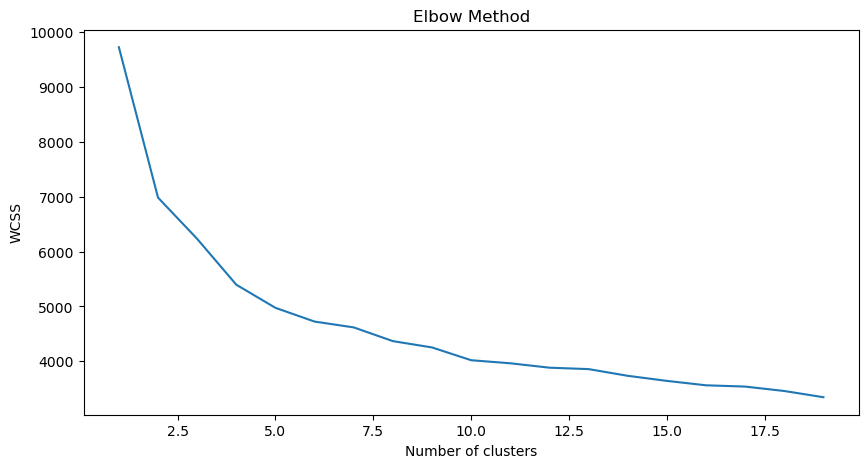

In [52]:
# show elbow plot
plt.figure(figsize=(10,5))
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [53]:
# cluster with k =
kmeans = KMeans(n_clusters=20, random_state=42)
kmeans.fit(x_scaled)

# add cluster column to players_to_cluster
players_to_cluster['Cluster'] = kmeans.labels_
players_to_cluster

c:\Users\17782\miniconda3\envs\nba_ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,Year,Player,Height (No Shoes),Weight,Wingspan,Standing reach,Hand (Length),Hand (Width),Vertical (No Step),Vertical (Max),...,Fta,Ft%,Orb,Drb,Rpg,Apg,Spg,Bpg,Tov,Cluster
0,2024,Trevon Brazile,81.30,215.0,87.8,108.5,9.0,10.0,33.0,41.0,...,2.3,0.695,1.7,4.2,5.9,0.5,0.7,1.2,1.5,17
1,2024,Carlton Carrington,75.80,194.8,80.0,99.0,9.0,9.0,29.0,37.0,...,2.8,0.785,0.5,4.7,5.2,4.1,0.6,0.2,1.9,4
2,2024,Devin Carter,74.30,193.0,80.8,98.0,9.0,9.0,35.0,42.0,...,5.0,0.749,1.0,7.4,8.4,3.5,1.7,0.9,2.6,7
3,2024,Isaiah Collier,74.50,204.6,76.8,97.5,9.0,9.0,30.0,34.0,...,5.8,0.673,0.6,2.3,2.9,4.3,1.5,0.2,3.3,14
4,2024,Zach Edey,87.80,299.0,94.8,115.0,10.0,11.0,26.0,32.0,...,11.5,0.710,4.7,7.5,12.2,2.0,0.3,2.2,2.2,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,2017,Jawun Evans,70.75,185.0,77.5,95.0,8.0,7.75,27.5,33.5,...,6.0,0.812,0.8,2.7,3.4,6.4,1.8,0.1,2.8,11
438,2017,Thomas Bryant,81.50,248.0,90.0,112.5,9.5,10.25,25.5,33.0,...,4.4,0.730,2.2,4.4,6.6,1.5,0.8,1.5,2.3,15
439,2017,Sindarius Thornwell,75.50,212.0,82.0,103.0,8.75,8.75,27.0,30.5,...,8.4,0.830,2.5,4.6,7.1,2.8,2.1,1.0,2.5,9
440,2017,Eric Mika,80.50,233.0,82.0,106.5,8.25,8.75,29.0,32.0,...,8.7,0.763,3.1,6.1,9.2,1.6,0.6,1.9,2.5,16


In [54]:
# show all players in cluster 3
players_to_cluster[players_to_cluster['Cluster'] == 4]



,Year,Player,Height (No Shoes),Weight,Wingspan,Standing reach,Hand (Length),Hand (Width),Vertical (No Step),Vertical (Max),...,Fta,Ft%,Orb,Drb,Rpg,Apg,Spg,Bpg,Tov,Cluster
1,2024,Carlton Carrington,75.80,194.8,80.00,99.0,9.0,9.0,29.0,37.0,...,2.8,0.785,0.5,4.7,5.2,4.1,0.6,0.2,1.9,4
12,2024,Pelle Larsson,77.30,212.4,79.50,102.0,8.75,10.3,30.5,38.0,...,3.2,0.750,1.1,3.0,4.1,3.7,0.9,0.2,1.9,4
13,2024,Jared McCain,74.00,203.2,75.50,98.0,8.25,9.5,25.5,33.0,...,2.4,0.885,0.8,4.2,5.0,1.9,1.1,0.1,1.3,4
20,2024,Reed Sheppard,73.80,181.6,75.30,93.5,7.75,9.0,32.5,42.0,...,2.0,0.831,0.4,3.8,4.1,4.5,2.5,0.7,2.0,4
22,2024,Ja'Kobe Walter,76.30,197.6,82.00,102.5,8.75,9.8,30.5,38.5,...,5.2,0.792,1.3,3.1,4.4,1.4,1.1,0.2,1.3,4
28,2023,Gradey Dick,78.30,204.0,80.80,101.0,8.25,9.0,29.0,34.0,...,2.5,0.854,1.1,4.0,5.1,1.7,1.4,0.3,1.3,4
29,2023,Adam Flagler,73.00,191.8,76.50,97.0,8.0,9.3,31.0,36.0,...,3.3,0.790,0.3,2.1,2.4,4.6,1.2,0.1,1.7,4
46,2022,Malaki Branham,76.00,194.8,82.00,102.5,8.5,9.8,29.0,35.0,...,3.0,0.833,0.8,2.8,3.6,2.0,0.8,0.3,1.7,4
50,2022,Keon Ellis,75.50,167.4,80.50,102.0,8.0,9.3,28.0,35.5,...,3.1,0.881,1.9,4.2,6.1,1.8,1.9,0.6,1.6,4
58,2022,Andrew Nembhard,75.00,195.6,77.75,99.0,8.0,9.5,26.5,35.0,...,1.7,0.873,0.4,2.9,3.4,5.8,1.6,0.1,1.9,4
